# Parsing xsd with xmlschema library

A Notebook to parse xsd / xml files into a Python dictionary. 

### Links:
- https://xmlschema.readthedocs.io/en/latest/ 
- https://pypi.org/project/xmlschema/


In [1]:
!pip install xmlschema

## 1. With xmlschema

In [9]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\webservices\\woningnet'

In [8]:
cd woningnet

C:\Users\31653\Documents\GitHub\Notebooks\de_alliantie\webservices\woningnet


In [11]:
cd Aanbieding

C:\Users\31653\Documents\GitHub\Notebooks\de_alliantie\webservices\woningnet\Aanbieding


In [12]:
import glob
my_xsds = glob.glob('*.xsd')
my_xsds

['AanbiedingISService_ep.xsd',
 'AanbiedingV1.xsd',
 'AdressenV1.xsd',
 'CommonV1.xsd',
 'ContactgegevensV1.xsd',
 'EigenaarV1.xsd',
 'GebruikerV1.xsd',
 'MediaV1.xsd',
 'MeldingenV1.xsd',
 'ObjectV1.xsd',
 'PersoonV1.xsd',
 'PublicatieV1.xsd',
 'ReactieSelectieV1.xsd',
 'ReactieV1.xsd',
 'ReferentiedataV1.xsd',
 'RegistratieV1.xsd']

In [14]:
#inspect the xsd
%pycat AanbiedingV1.xsd

In [15]:
#source: https://stackoverflow.com/questions/1072853/how-to-convert-xsd-to-python-class
#https://stackoverflow.com/questions/54687837/parse-an-xsd-file-using-python
#convert the xml to a dict
import xmlschema
schema = xmlschema.XMLSchema('AanbiedingV1.xsd')
print(type(schema))
print(dir(schema))

<class 'xmlschema.validators.schemas.XMLSchema10'>
['BASE_SCHEMAS', 'XSD_VERSION', '__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_annotations', '_get_xpath_namespaces', '_import_namespace', '_is_protocol', '_locations', '_parse_imports', '_parse_inclusions', '_parse_xpath_default_namespace', '_root_elements', '_validate_references', 'add_schema', 'all_errors', 'allow', 'annotations', 'attrib', 'attribute_form_default', 'attribute_groups', 'attributes', 'base

In [16]:
# get the components
for xsd_component in schema.iter_components():
    print(xsd_component)

XMLSchema10(name='AanbiedingV1.xsd', namespace='http://www.woningnet.nl/Contracten/Wozo/Aanbieding')
XsdComplexType(name='abg:ActueleAanbiedingKey')
XsdGroup(model='sequence', occurs=[1, 1])
XsdElement(ref='prs:PersoonKey', occurs=[1, 1])
XsdElement(ref='pub:PublicatieKey', occurs=[1, 1])
XsdComplexType(name='abg:AanbiedingReactie')
XsdGroup(model='sequence', occurs=[1, 1])
XsdElement(name='abg:ActueleAanbiedingKey', occurs=[1, 1])
XsdElement(name='abg:Antwoord', occurs=[1, 1])
XsdElement(name='abg:Reden', occurs=[1, 1])
XsdElement(name='abg:Motivatie', occurs=[0, 1])
XsdComplexType(name='abg:ActueleAanbiedingen')
XsdGroup(model='sequence', occurs=[1, 1])
XsdElement(name='abg:ActueleAanbieding', occurs=[0, None])
XsdComplexType(name='abg:ActueleAanbieding')
XsdGroup(model='sequence', occurs=[1, 1])
XsdElement(name='abg:ActueleAanbiedingKey', occurs=[1, 1])
XsdElement(name='abg:PublicatieXML', occurs=[1, 1])
XsdComplexType(content='element-only', attributes=[])
XsdGroup(model='sequence'

In [17]:
#https://readthedocs.org/projects/xmlschema/downloads/pdf/latest/ p.23
for xsd_component in schema.iter_components():
    #print(xsd_component)
    if str(xsd_component.name) != 'None':
        print(xsd_component.name)

AanbiedingV1.xsd
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}ActueleAanbiedingKey
{http://www.woningnet.nl/Contracten/Wozo/Persoon}PersoonKey
{http://www.woningnet.nl/Contracten/Aanbod/Publicatie}PublicatieKey
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}AanbiedingReactie
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}ActueleAanbiedingKey
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}Antwoord
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}Reden
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}Motivatie
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}ActueleAanbiedingen
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}ActueleAanbieding
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}ActueleAanbieding
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}ActueleAanbiedingKey
{http://www.woningnet.nl/Contracten/Wozo/Aanbieding}PublicatieXML
{http://www.woningnet.nl/Contracten/Wozo/ReactieSelectie}SelectieSummary
{http://www.woningnet.nl/Contracte

In [20]:
# print some basic aspects of the xsd
print(schema.name)
print(schema.namespaces)

AanbiedingV1.xsd
{'xml': 'http://www.w3.org/XML/1998/namespace', 'xs': 'http://www.w3.org/2001/XMLSchema', 'abg': 'http://www.woningnet.nl/Contracten/Wozo/Aanbieding', 'prs': 'http://www.woningnet.nl/Contracten/Wozo/Persoon', 'pub': 'http://www.woningnet.nl/Contracten/Aanbod/Publicatie', 'reg': 'http://www.woningnet.nl/Contracten/Wozo/Registratie', 'rsel': 'http://www.woningnet.nl/Contracten/Wozo/ReactieSelectie', 'adr': 'http://www.woningnet.nl/Contracten/Common/Adressen', 'cgg': 'http://www.woningnet.nl/Contracten/Wozo/Contactgegevens', 'obj': 'http://www.woningnet.nl/Contracten/Aanbod/Object', '': ''}


In [21]:
from pprint import pprint
pprint(schema)

XMLSchema10(name='AanbiedingV1.xsd', namespace='http://www.woningnet.nl/Contracten/Wozo/Aanbieding')


In [22]:
from pprint import pprint
pprint(schema.elements)
print(dir(schema.elements))

NamespaceView({'ActueleAanbiedingKey': XsdElement(name='abg:ActueleAanbiedingKey', occurs=[1, 1]), 'AanbiedingReactie': XsdElement(name='abg:AanbiedingReactie', occurs=[1, 1]), 'ActueleAanbiedingen': XsdElement(name='abg:ActueleAanbiedingen', occurs=[1, 1]), 'ActueleAanbieding': XsdElement(name='abg:ActueleAanbieding', occurs=[1, 1]), 'ActueleAanbiedingenKey': XsdElement(name='abg:ActueleAanbiedingenKey', occurs=[1, 1]), 'DomeinItem': XsdElement(name='abg:DomeinItem', occurs=[1, 1]), 'KandidaatKey': XsdElement(name='abg:KandidaatKey', occurs=[1, 1]), 'KandidatenKey': XsdElement(name='abg:KandidatenKey', occurs=[1, 1]), 'Kandidaat': XsdElement(name='abg:Kandidaat', occurs=[1, 1]), 'Kandidaten': XsdElement(name='abg:Kandidaten', occurs=[1, 1])})
['__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__',

In [23]:
BT = schema.elements['ActueleAanbiedingKey']
print(BT.schema)
print(BT.attributes)

XMLSchema10(name='AanbiedingV1.xsd', namespace='http://www.woningnet.nl/Contracten/Wozo/Aanbieding')
XsdAttributeGroup()


In [24]:
dir(BT.type)

['_ADMITTED_TAGS',
 '_CONTENT_TAIL_TAGS',
 '_REGEX_SPACE',
 '_REGEX_SPACES',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotation',
 '_block',
 '_final',
 '_is_protocol',
 '_parse',
 '_parse_base_type',
 '_parse_child_component',
 '_parse_complex_content_extension',
 '_parse_complex_content_restriction',
 '_parse_content_tail',
 '_parse_derivation_elem',
 '_parse_reference',
 '_parse_simple_content_extension',
 '_parse_simple_content_restriction',
 '_parse_target_namespace',
 '_parse_xpath_default_namespace',
 'abstract',
 'admit_simple_restriction',
 'all

In [69]:
BT.type.content

XsdGroup(model='sequence', occurs=[1, 1])

In [25]:
for item in BT.type.content:
    print(item.name)

{http://www.woningnet.nl/Contracten/Wozo/Persoon}PersoonKey
{http://www.woningnet.nl/Contracten/Aanbod/Publicatie}PublicatieKey


In [26]:
for item in BT.type.content:
    print(item.name)

{http://www.woningnet.nl/Contracten/Wozo/Persoon}PersoonKey
{http://www.woningnet.nl/Contracten/Aanbod/Publicatie}PublicatieKey


In [27]:
for e in BT.type.content.iter_elements():
    print(e.name)

{http://www.woningnet.nl/Contracten/Wozo/Persoon}PersoonKey
{http://www.woningnet.nl/Contracten/Aanbod/Publicatie}PublicatieKey


## 2. With xsdata-plantuml

source: https://pypi.org/project/xsdata-plantuml/ <br>

In [10]:
!pip install xsdata-plantuml

In [28]:
import glob
my_xsds = glob.glob('*.xsd')
my_xsds

['AanbiedingISService_ep.xsd',
 'AanbiedingV1.xsd',
 'AdressenV1.xsd',
 'CommonV1.xsd',
 'ContactgegevensV1.xsd',
 'EigenaarV1.xsd',
 'GebruikerV1.xsd',
 'MediaV1.xsd',
 'MeldingenV1.xsd',
 'ObjectV1.xsd',
 'PersoonV1.xsd',
 'PublicatieV1.xsd',
 'ReactieSelectieV1.xsd',
 'ReactieV1.xsd',
 'ReferentiedataV1.xsd',
 'RegistratieV1.xsd']

In [36]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\webservices\\woningnet\\Aanbieding\\generated'

In [42]:
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\webservices\\woningnet\\Aanbieding\AdressenV1.xsd

In [29]:
!xsdata AdressenV1.xsd --output plantuml

Parsing schema AdressenV1.xsd
Parsing schema CommonV1.xsd
Parsing schema PersoonV1.xsd
Compiling schema PersoonV1.xsd
Builder: 5 main and 0 inner classes
Parsing schema ObjectV1.xsd
Parsing schema MediaV1.xsd
Compiling schema MediaV1.xsd
Builder: 10 main and 0 inner classes
Parsing schema EigenaarV1.xsd
Parsing schema ReferentiedataV1.xsd
Compiling schema ReferentiedataV1.xsd
Builder: 8 main and 0 inner classes
Compiling schema EigenaarV1.xsd
Builder: 21 main and 0 inner classes
Compiling schema ObjectV1.xsd
Builder: 36 main and 7 inner classes
Compiling schema CommonV1.xsd
Builder: 11 main and 1 inner classes
Compiling schema AdressenV1.xsd
Builder: 8 main and 0 inner classes
Analyzer input: 99 main and 8 inner classes
Analyzer output: 64 main and 8 inner classes
Generating package: generated.PersoonV1
Generating package: generated.MediaV1
Generating package: generated.ReferentiedataV1
Generating package: generated.EigenaarV1
Generating package: generated.ObjectV1
Generating package: 

In [30]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2818-58FB

 Directory of C:\Users\31653\Documents\GitHub\Notebooks\de_alliantie\webservices\woningnet\Aanbieding

17/03/2022  10:58    <DIR>          .
17/03/2022  10:58    <DIR>          ..
17/03/2022  10:50             1.817 AanbiedingISService_ep.xsd
17/03/2022  10:50             5.992 AanbiedingV1.xsd
17/03/2022  10:50             3.098 AdressenV1.xsd
17/03/2022  10:50             2.774 CommonV1.xsd
17/03/2022  10:50             1.229 ContactgegevensV1.xsd
17/03/2022  10:50             4.685 EigenaarV1.xsd
17/03/2022  10:50             6.496 GebruikerV1.xsd
17/03/2022  10:58    <DIR>          generated
17/03/2022  10:50             3.026 MediaV1.xsd
17/03/2022  10:50             3.242 MeldingenV1.xsd
17/03/2022  10:50            12.985 ObjectV1.xsd
17/03/2022  10:50             1.862 PersoonV1.xsd
17/03/2022  10:50             9.165 PublicatieV1.xsd
17/03/2022  10:50             1.580 ReactieSelectieV1.xsd
17/03/2022  10:50         

In [31]:
cd generated

C:\Users\31653\Documents\GitHub\Notebooks\de_alliantie\webservices\woningnet\Aanbieding\generated


In [32]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2818-58FB

 Directory of C:\Users\31653\Documents\GitHub\Notebooks\de_alliantie\webservices\woningnet\Aanbieding\generated

17/03/2022  10:58    <DIR>          .
17/03/2022  10:58    <DIR>          ..
17/03/2022  10:58               655 AdressenV1.pu
17/03/2022  10:58               556 CommonV1.pu
17/03/2022  10:58             1.120 EigenaarV1.pu
17/03/2022  10:58               803 MediaV1.pu
17/03/2022  10:58             3.570 ObjectV1.pu
17/03/2022  10:58               420 PersoonV1.pu
17/03/2022  10:58               595 ReferentiedataV1.pu
               7 File(s)          7.719 bytes
               2 Dir(s)  201.164.746.752 bytes free


In [34]:
%pycat AdressenV1.pu

In [38]:
!python -m plantuml AdressenV1.pu

[{'filename': 'AdressenV1.pu', 'gen_success': True}]


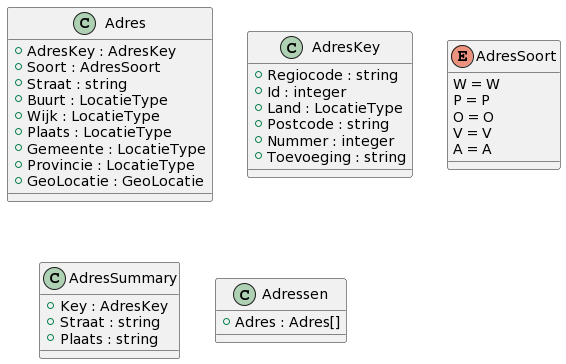

In [41]:
from IPython import display
display.Image(filename='AdressenV1.png')

## 3. With lxml validation
source: https://lxml.de/validation.html

In [45]:
from lxml import etree
parser = etree.XMLParser(dtd_validation=True)
schema_root = etree.XML('''\
    <xsd:schema xmlns:xsd="http://www.w3.org/2001/XMLSchema">
    <xsd:element name="a" type="xsd:integer"/>
    </xsd:schema>
''')
schema = etree.XMLSchema(schema_root)


In [46]:
schema

In [47]:
parser = etree.XMLParser(schema = schema)
#root = etree.fromstring("<a>5</a>", parser)

In [50]:
dir(parser)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'copy',
 'error_log',
 'feed',
 'feed_error_log',
 'makeelement',
 'resolvers',
 'setElementClassLookup',
 'set_element_class_lookup',
 'target',
 'version']

In [51]:
dir(schema)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_append_log_message',
 '_clear_error_log',
 'assertValid',
 'assert_',
 'error_log',
 'validate']

In [52]:
schema.validate

<bound method _Validator.validate of <lxml.etree.XMLSchema object at 0x00000222498E0400>>